In [1]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=80f8ac0a6a22437180bc3f1f485741896e5dd2c64550975a366dbbefb8fbb51c
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [17]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns





In [18]:
df = pd.read_csv('/content/drive/MyDrive/CEG/SEM 2/Big Data/Mini Project BD/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']


In [20]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [21]:
# Remove unnecessary columns
df = df[['target', 'text']]

# Preprocess the text
# Add your text preprocessing steps here using scikit-learn or other libraries

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [6]:
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [7]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train_tfidf, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [8]:
# Make predictions
y_pred = clf.predict(X_test_tfidf)
df1 = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': y_pred})
df1

,Actual,Predicted
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
319995,1,1
319996,1,1
319997,1,1
319998,1,0


In [23]:

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
confusion_mat = confusion_matrix(y_test_encoded, y_pred)
print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 80.2121875
Confusion Matrix:
[[126342  33152]
 [ 30169 130337]]


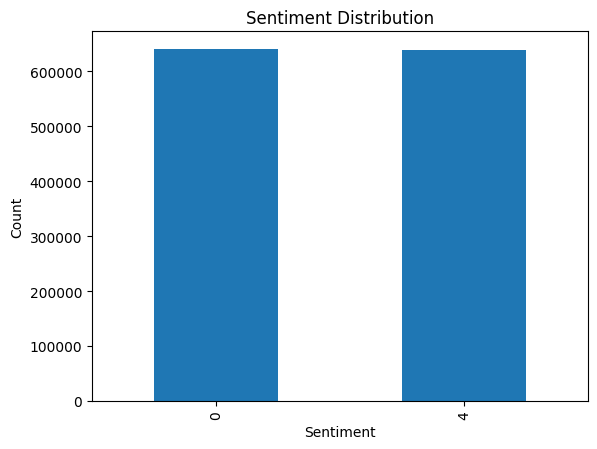

In [24]:
sentiment_counts = pd.Series(label_encoder.inverse_transform(y_train_encoded)).value_counts()
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


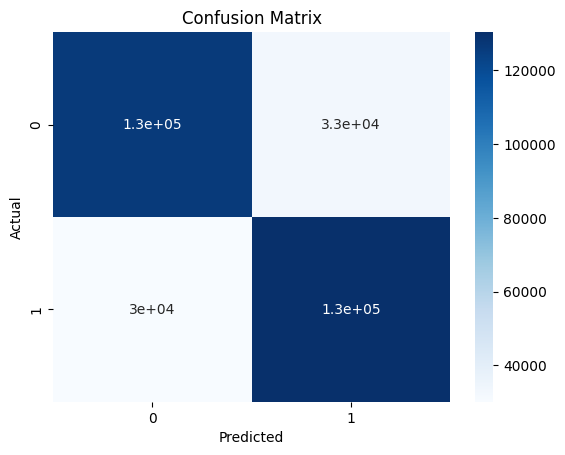

In [25]:
confusion_mat = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

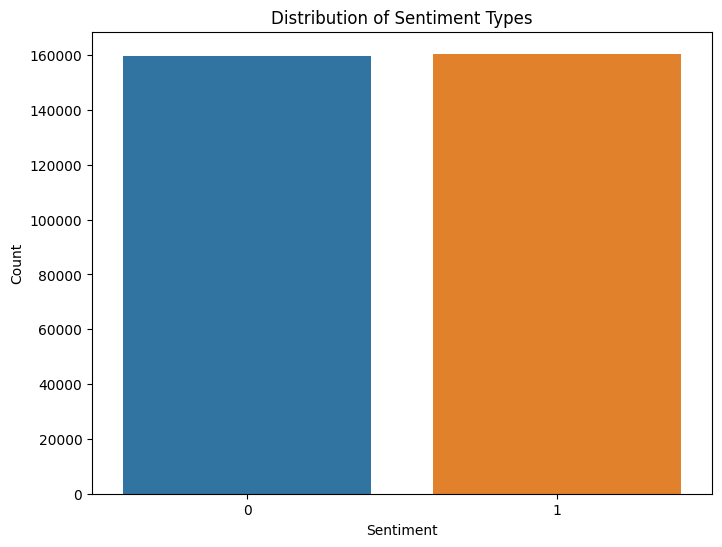

In [26]:
sentiment_counts = df1['Actual'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Types')
plt.show()

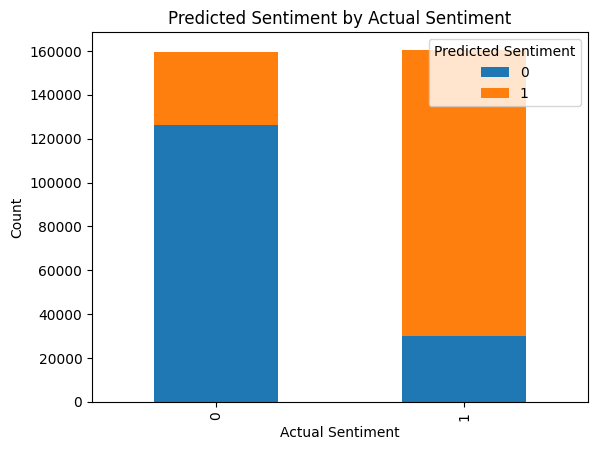

In [27]:
sentiment_cross = pd.crosstab(df1['Actual'], df1['Predicted'])
sentiment_cross.plot(kind='bar', stacked=True)
plt.xlabel('Actual Sentiment')
plt.ylabel('Count')
plt.title('Predicted Sentiment by Actual Sentiment')
plt.legend(title='Predicted Sentiment')
plt.show()

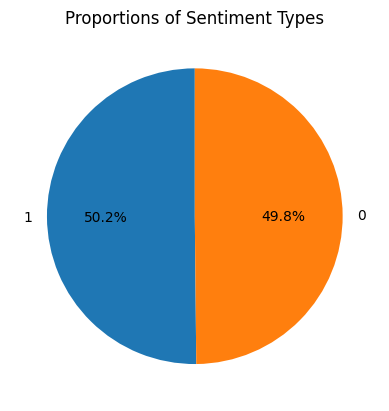

In [28]:
sentiment_proportions = df1['Actual'].value_counts(normalize=True)
plt.pie(sentiment_proportions, labels=sentiment_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportions of Sentiment Types')
plt.show()

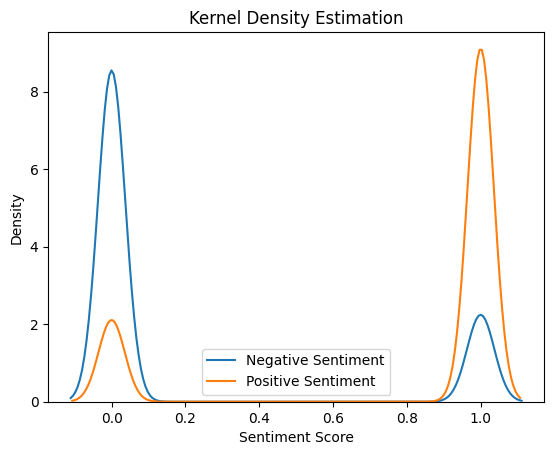

In [32]:
# KDE plot for each sentiment class
sns.kdeplot(df1[df1['Actual'] == 0]['Predicted'], label='Negative Sentiment')
sns.kdeplot(df1[df1['Actual'] == 1]['Predicted'], label='Positive Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()


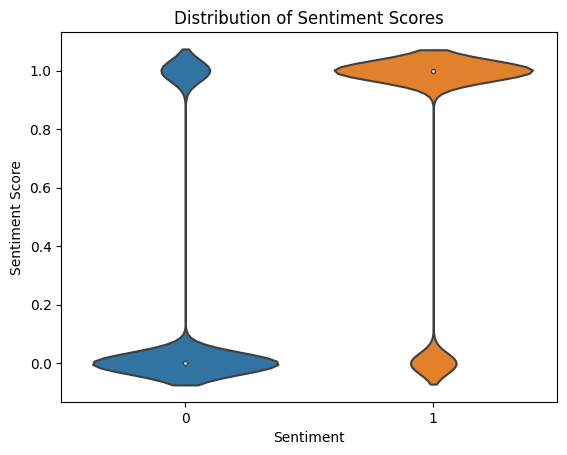

In [36]:
# Violin plot for each sentiment class
sns.violinplot(x='Actual', y='Predicted', data=df1)
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores')
plt.show()


In [41]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [50]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [44]:
def predict_sentiment(sentence):
    # Preprocess the sentence
    preprocessed_sentence = preprocess_sentence(sentence)
    
    # Vectorize the preprocessed sentence using TF-IDF vectorizer
    sentence_vector = vectorizer.transform([preprocessed_sentence])
    
    # Predict the sentiment using the trained classifier
    sentiment_prediction = clf.predict(sentence_vector)[0]
    
    return sentiment_prediction

In [43]:
def preprocess_sentence(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    
    # Remove special characters and numbers
    sentence = re.sub(r"[^a-zA-Z\s]", "", sentence)
    
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a sentence
    preprocessed_sentence = " ".join(tokens)
    
    return preprocessed_sentence

In [53]:
input_sentence = input("Enter a sentence: ")
sentiment = predict_sentiment(input_sentence)
if sentiment==0:
  print(f"This is a negative sentiment and the accuracy is {accuracy*100}")
else:
  print(f"This is a positive sentiment and the accuracy is {accuracy*100}")
  


Enter a sentence: this is a bad sentence 
This is a negative sentiment and the accuracy is 80.2121875
